# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

631

In [211]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city="London"
units="imperial"
query_url = f"{url}appid={api_key_weather}&units={units}&q="
response=requests.get(query_url + city)
weather_data=response.json()
print(weather_data)
print(weather_data['name'])
print(weather_data['clouds']['all'])
print(weather_data['sys']['country'])
print(weather_data['dt'])
print(weather_data['main']['humidity'])
print(weather_data['coord']['lon'])
print(weather_data['coord']['lat'])
print(weather_data['main']['temp_max'])
print(weather_data['wind']['speed'])

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.27, 'feels_like': 54.77, 'temp_min': 53.2, 'temp_max': 56.55, 'pressure': 1013, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1641083335, 'sys': {'type': 2, 'id': 2019646, 'country': 'GB', 'sunrise': 1641110761, 'sunset': 1641139355}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}
London
75
GB
1641083335
91
-0.1257
51.5085
56.55
11.5


In [212]:
weatherdata=[]
url = "http://api.openweathermap.org/data/2.5/weather?"
#city="Tasiilaq"
units="imperial"
query_url = f"{url}appid={api_key_weather}&units={units}&q="
n=0
print(f"Beginning Data Retrieval")     
print(f"-------------------------")
for city in cities:
    response=requests.get(query_url + city)
    weather_data=response.json()
    n=n+1

    try:
        City=weather_data['name']
        Lat=weather_data['coord']['lat']
        Lng=weather_data['coord']['lon']
        Maxtemp=weather_data['main']['temp_max']
        Humidity=weather_data['main']['humidity']
        Cloudiness=weather_data['clouds']['all']
        WindSpeed=weather_data['wind']['speed']
        Country=weather_data['sys']['country']
        Date=weather_data['dt']     
        weatherdata.append([City,Lat,Lng,Maxtemp,Humidity,Cloudiness,WindSpeed,Country,Date])
        print(f"processing data for {n}| {city}")
        time.sleep(.5)
    except:
        print(f"City not found.Skipping...")
             
    
              

Beginning Data Retrieval
-------------------------
processing data for 1| ozu
processing data for 2| laguna
processing data for 3| bealanana
processing data for 4| bredasdorp
processing data for 5| ouadda
processing data for 6| hobart
processing data for 7| lodhran
processing data for 8| jamestown
processing data for 9| lae
processing data for 10| cidreira
processing data for 11| constitucion
processing data for 12| skibbereen
City not found.Skipping...
processing data for 14| new norfolk
processing data for 15| mataura
processing data for 16| severo-kurilsk
processing data for 17| norden
processing data for 18| vestmannaeyjar
processing data for 19| tabuk
processing data for 20| rikitea
City not found.Skipping...
processing data for 22| ribeira grande
processing data for 23| albany
processing data for 24| hermanus
processing data for 25| cabo san lucas
processing data for 26| san jeronimo
processing data for 27| kaitangata
processing data for 28| nhamunda
processing data for 29| willo

processing data for 249| san pedro
City not found.Skipping...
processing data for 251| nishihara
processing data for 252| ossora
processing data for 253| omboue
City not found.Skipping...
processing data for 255| songea
City not found.Skipping...
processing data for 257| rio gallegos
City not found.Skipping...
processing data for 259| lagoa
City not found.Skipping...
processing data for 261| muyezerskiy
processing data for 262| seoul
processing data for 263| pachmarhi
processing data for 264| karratha
processing data for 265| cervo
processing data for 266| nanortalik
processing data for 267| salalah
processing data for 268| henties bay
processing data for 269| jiaocheng
processing data for 270| saint george
processing data for 271| omsukchan
processing data for 272| codrington
processing data for 273| port-gentil
processing data for 274| anchorage
processing data for 275| dicabisagan
processing data for 276| roccastrada
processing data for 277| aquiraz
processing data for 278| kununurr

City not found.Skipping...
processing data for 491| esso
processing data for 492| san jose
processing data for 493| verkhnevilyuysk
processing data for 494| kamenka
processing data for 495| waitati
processing data for 496| iquique
processing data for 497| pinotepa nacional
processing data for 498| ola
processing data for 499| chapais
processing data for 500| marquette
processing data for 501| raduzhnyy
processing data for 502| turukhansk
processing data for 503| port lincoln
City not found.Skipping...
processing data for 505| caravelas
processing data for 506| kaeo
processing data for 507| tual
processing data for 508| salinopolis
processing data for 509| ujhartyan
processing data for 510| mount isa
processing data for 511| altayskoye
City not found.Skipping...
processing data for 513| faya
processing data for 514| medianeira
processing data for 515| san quintin
processing data for 516| bubaque
processing data for 517| chai badan
processing data for 518| georgiyevka
processing data for

In [213]:
weatherdata

[['Ōzu', 33.5, 132.55, 45.18, 58, 24, 2.15, 'JP', 1641083449],
 ['Laguna', 38.421, -121.4238, 51.98, 52, 1, 1.01, 'US', 1641083449],
 ['Bealanana', -14.55, 48.7333, 66.74, 92, 100, 2.26, 'MG', 1641083450],
 ['Bredasdorp', -34.5322, 20.0403, 56.52, 67, 13, 5.75, 'ZA', 1641083451],
 ['Ouadda', 8.0777, 22.4007, 69.69, 37, 93, 5.28, 'CF', 1641083451],
 ['Hobart', -42.8794, 147.3294, 66.06, 78, 75, 14.97, 'AU', 1641083208],
 ['Lodhran', 29.5405, 71.6336, 53.08, 26, 89, 6.93, 'PK', 1641083453],
 ['Jamestown', 42.097, -79.2353, 48.09, 73, 90, 1.99, 'US', 1641083453],
 ['Lae', -6.7221, 146.9847, 86.67, 62, 100, 2.82, 'PG', 1641083454],
 ['Cidreira', -30.1811, -50.2056, 72.88, 88, 0, 14.2, 'BR', 1641083454],
 ['Constitución', -35.3333, -72.4167, 56.57, 92, 64, 5.86, 'CL', 1641083455],
 ['Skibbereen', 51.55, -9.2667, 51.6, 88, 12, 19.98, 'IE', 1641083456],
 ['New Norfolk', -42.7826, 147.0587, 65.71, 56, 100, 3.58, 'AU', 1641083457],
 ['Mataura', -46.1927, 168.8643, 85.01, 31, 100, 3.22, 'NZ', 16

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [214]:
#converting to data frame
weatherdata_df=pd.DataFrame(weatherdata,columns=["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])
#displaying the data frame
weatherdata_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ōzu,33.5000,132.5500,45.18,58,24,2.15,JP,1641083449
1,Laguna,38.4210,-121.4238,51.98,52,1,1.01,US,1641083449
2,Bealanana,-14.5500,48.7333,66.74,92,100,2.26,MG,1641083450
3,Bredasdorp,-34.5322,20.0403,56.52,67,13,5.75,ZA,1641083451
4,Ouadda,8.0777,22.4007,69.69,37,93,5.28,CF,1641083451


In [215]:
#writing to CSV file
weatherdata_df.to_csv("Output_data/CityWeather.csv")

In [216]:
weatherdata_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.329796,11.624655,50.194792,74.633681,60.980903,8.021215,1.641084e+09
std,32.964649,89.664850,31.585553,19.214836,40.525479,6.330527,1.189104e+02
min,-54.800000,-179.166700,-56.200000,15.000000,0.000000,0.000000,1.641083e+09
25%,-5.804200,-68.227925,29.972500,66.000000,19.000000,3.440000,1.641084e+09
50%,23.180100,14.657200,59.855000,78.000000,75.000000,6.680000,1.641084e+09
75%,47.114775,88.852925,75.227500,89.000000,100.000000,10.360000,1.641084e+09
max,78.218600,179.316700,98.370000,100.000000,100.000000,47.360000,1.641084e+09


In [217]:
##finding data of citiies having humditiy over 100
weatherdata_df_updated=weatherdata_df[weatherdata_df.Humidity>100]
#showing the updated datafrome with no values. Hence no city with humidity over 100%
weatherdata_df_updated.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [218]:
weatherdata_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

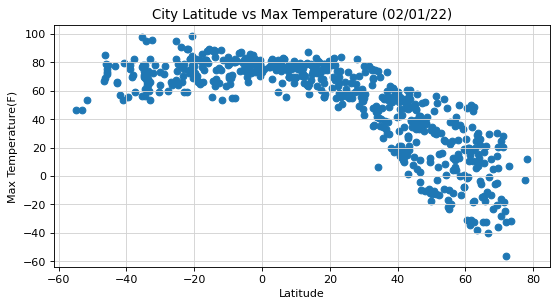

In [219]:
Date = time.strftime("%d/%m/%y")
plt.figure
fig=plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(weatherdata_df["Lat"],weatherdata_df["Max Temp"])
plt.title(f"City Latitude vs Max Temperature ({Date})")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/CityLatitudeVsMaxTemp.png")

## Latitude vs. Humidity Plot

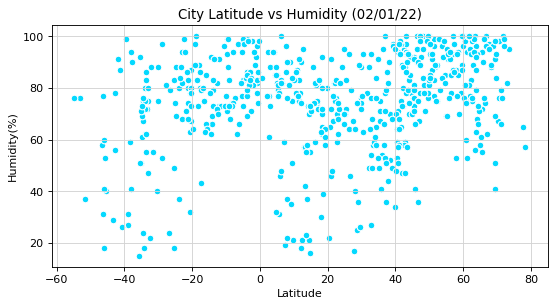

In [220]:
plt.figure
fig=plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(weatherdata_df["Lat"],weatherdata_df["Humidity"],c="#04d9ff", edgecolor="white")
plt.title(f"City Latitude vs Humidity ({Date})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/CityLatitudeVsHumidity.png")

In [ ]:
The graph doesnt show a clear relationship between latitude and humidity however, mostly countries around the globe tend to
have a higher humidity level. 

## Latitude vs. Cloudiness Plot

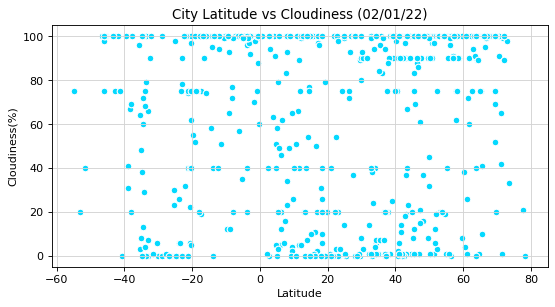

In [221]:
plt.figure
fig=plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(weatherdata_df["Lat"],weatherdata_df["Cloudiness"],c="#04d9ff", edgecolor="white")
plt.title(f"City Latitude vs Cloudiness ({Date})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/CityLatitudeVsCloudiness.png")

## Latitude vs. Wind Speed Plot

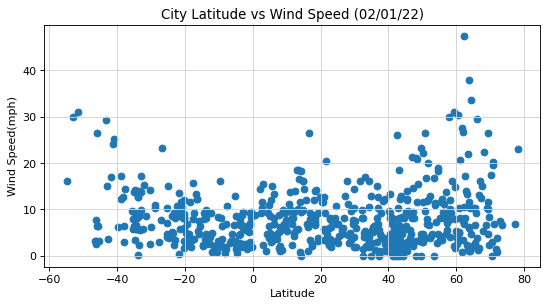

In [222]:
plt.figure
fig=plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(weatherdata_df["Lat"],weatherdata_df["Wind Speed"])
plt.title(f"City Latitude vs Wind Speed ({Date})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/CityLatitudeVsWindSpeed.png")

In [223]:
#nh_lat=weatherdata_df[weatherdata_df["Lat"]>80]
#weatherdata_df["Lat"].astype("float")
#weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
#weatherdata_df_nh=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]
print(weatherdata_df_nh.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 553
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        390 non-null    object 
 1   Lat         390 non-null    object 
 2   Lng         390 non-null    float64
 3   Max Temp    390 non-null    float64
 4   Humidity    390 non-null    int64  
 5   Cloudiness  390 non-null    int64  
 6   Wind Speed  390 non-null    float64
 7   Country     390 non-null    object 
 8   Date        390 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 30.5+ KB
None


## Linear Regression

r values is: -0.7612833092345813


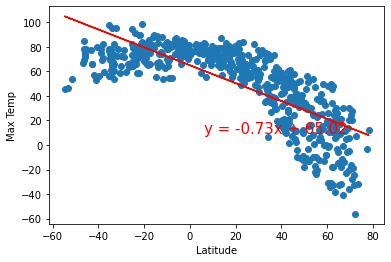

<Figure size 432x288 with 0 Axes>

In [224]:
x_values=weatherdata_df["Lat"].astype('float')
y_values = weatherdata_df["Max Temp"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/CityLatitudeVsMaxTemp_LR.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r values is: -0.8327486861636271


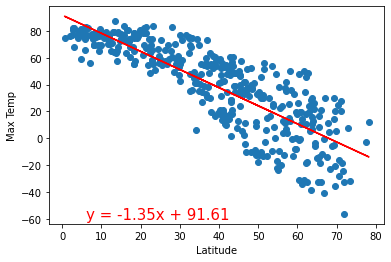

<Figure size 432x288 with 0 Axes>

In [225]:
#converting first lat to str to find the values above 0 for northern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_north_hs=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]

x_values=weatherdata_df_north_hs["Lat"].astype('float')
y_values = weatherdata_df_north_hs["Max Temp"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/NHLatitudeVsMaxTemp_LR.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r values is: 0.31237182305734984


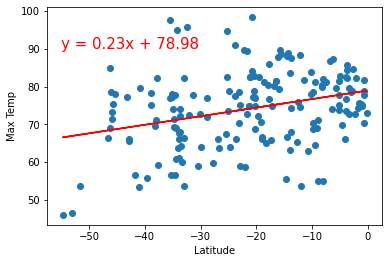

<Figure size 432x288 with 0 Axes>

In [226]:
#converting first lat to str to find the values below 0 for southern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_south_hs=weatherdata_df.loc[weatherdata_df["Lat"]<"0"]

x_values=weatherdata_df_south_hs["Lat"].astype('float')
y_values = weatherdata_df_south_hs["Max Temp"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq1,(-55,90),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/SHLatitudeVsMaxTemp_LR.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r values is: 0.3264227461477357


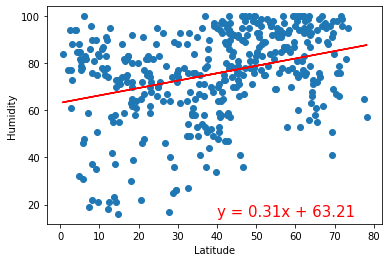

<Figure size 432x288 with 0 Axes>

In [227]:
#converting first lat to str to find the values above 0 for northern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_north_hs=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]

x_values=weatherdata_df_north_hs["Lat"].astype('float')
y_values = weatherdata_df_north_hs["Humidity"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/HumidityVsNHLatitude_LR.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r values is: 0.4847873132691405


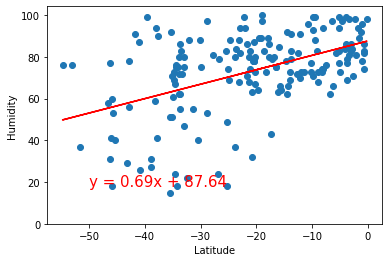

<Figure size 432x288 with 0 Axes>

In [228]:
#converting first lat to str to find the values below 0 for southern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_south_hs=weatherdata_df.loc[weatherdata_df["Lat"]<"0"]

x_values=weatherdata_df_south_hs["Lat"].astype('float')
y_values = weatherdata_df_south_hs["Humidity"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.yticks(np.arange(0,120, 20))

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/HumidityVsSHLatitude_LR.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r values is: 0.3062629022214302


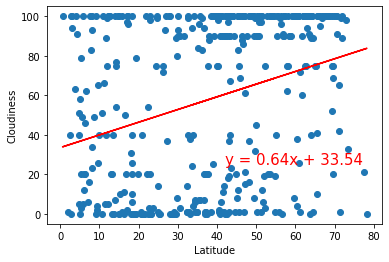

<Figure size 432x288 with 0 Axes>

In [229]:
#converting first lat to str to find the values above 0 for northern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_north_hs=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]

x_values=weatherdata_df_north_hs["Lat"].astype('float')
y_values = weatherdata_df_north_hs["Cloudiness"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/CloudinessVsNHLatitude_LR.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r values is: 0.2713770611566843


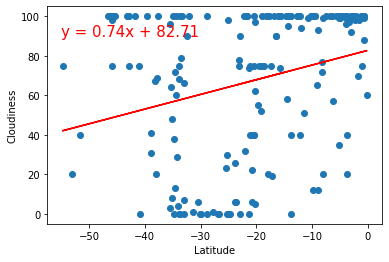

<Figure size 432x288 with 0 Axes>

In [230]:
#converting first lat to str to find the values below 0 for southern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_south_hs=weatherdata_df.loc[weatherdata_df["Lat"]<"0"]

x_values=weatherdata_df_south_hs["Lat"].astype('float')
y_values = weatherdata_df_south_hs["Cloudiness"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.yticks(np.arange(0,120, 20))

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/CloudinessVsSHLatitude_LR.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r values is: 0.13958856738498232


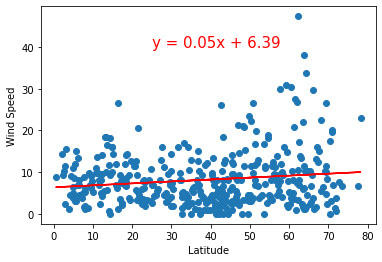

<Figure size 432x288 with 0 Axes>

In [231]:
#converting first lat to str to find the values above 0 for northern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_north_hs=weatherdata_df.loc[weatherdata_df["Lat"]>"0"]

x_values=weatherdata_df_north_hs["Lat"].astype('float')
y_values = weatherdata_df_north_hs["Wind Speed"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/WindSpeedVsNHLatitude_LR.png")

In [ ]:
The pattern above shows that wind speed for most of the countries in northern hemisphere is in the range of 0-10 mph however,
there are some countries with latitude between 60~70 where the wind speed goes above 40 mph

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r values is: -0.46138478030300056


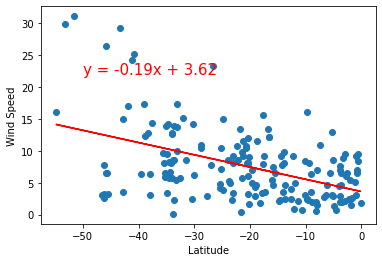

<Figure size 432x288 with 0 Axes>

In [232]:
#converting first lat to str to find the values below 0 for southern hemisphere
weatherdata_df["Lat"]=weatherdata_df["Lat"].astype('str')
weatherdata_df_south_hs=weatherdata_df.loc[weatherdata_df["Lat"]<"0"]

x_values=weatherdata_df_south_hs["Lat"].astype('float')
y_values = weatherdata_df_south_hs["Wind Speed"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#plt.yticks(np.arange(0,120, 20))

print(f"r values is: {rvalue}")

#show plot
plt.show()
plt.savefig("Figures/WindSpeedVsSHLatitude_LR.png")